In [1]:
from base import np
from oneD import Solver1D

# Export figures to Folder
figures_path = "../Figures/Nutrients1D/"

# Results for Different Diffusion Rates
Using the non-dimentionalised **Steady State Diffusion Equation with Consumption**:
$$
\frac{\partial^2 n}{\partial x^2} - \alpha n(x) c(x) = 0
$$

Comparing the consumption timescale to the diffusion's:
$$
T_c := \frac{1}{\alpha c(x)} \approx \frac{1}{\alpha}
$$
$$
\left(
    D \overset{!}{=} 1
    \quad \Rightarrow \quad
    T_d := \frac{L^2}{D} = 1 \right
    )
$$

We get:
$$
\frac{T_c}{T_d} = 
\begin{cases} 
    \gg 1,  \;  \text{Consumption domiation}  \\
    \sim 1, \;  \text{Comparable timescales} \\
    \ll 1,  \;  \text{Diffusion domination}
\end{cases}

\newline

\implies
T_c =
\begin{cases} 
10 \\ 
1 \\ 
0.1 
\end{cases}

\implies
\alpha = 
\begin{cases} 
0.1 \\ 
1 \\ 
10 
\end{cases}
$$

In [12]:
syst_params = {
'L' : 1,  'T' : 1,      # Lenght & Time Domain
'Tc': 1,                # Consumption Time
'nx': 50,   'nt': 100   # Num Spatial/Temporal Points
}
L = syst_params['L']

def n0_linear(x):
    return x / L
def c_const(x):
    return np.ones_like(x)

### Diffusion Domination ($T_c \ll 1$)

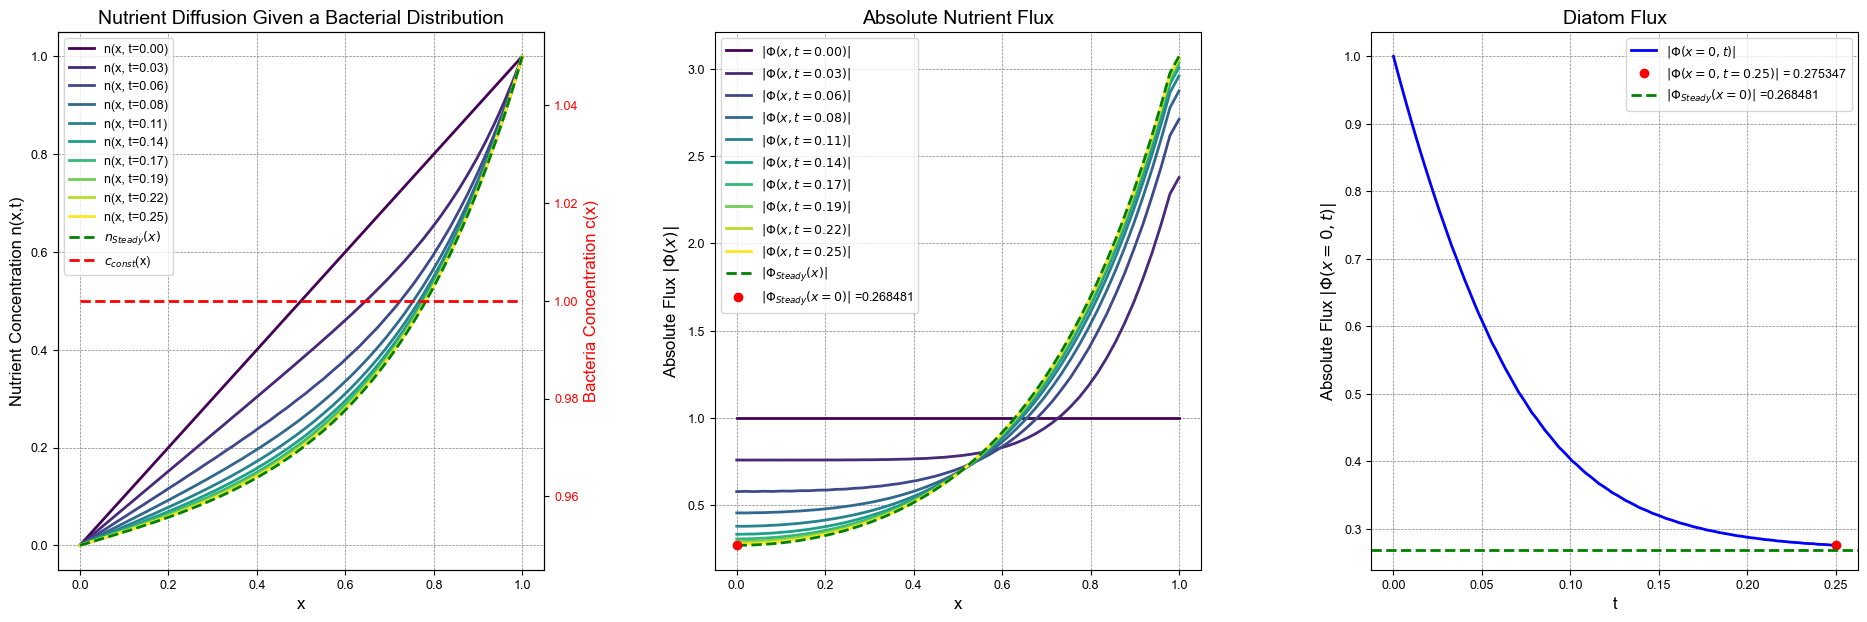

In [10]:
syst_params['Tc'] = 0.1
syst_params['T']  = 0.25

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "Diff_Dom")

### Comparable Timescales ($T_c \sim 1$)

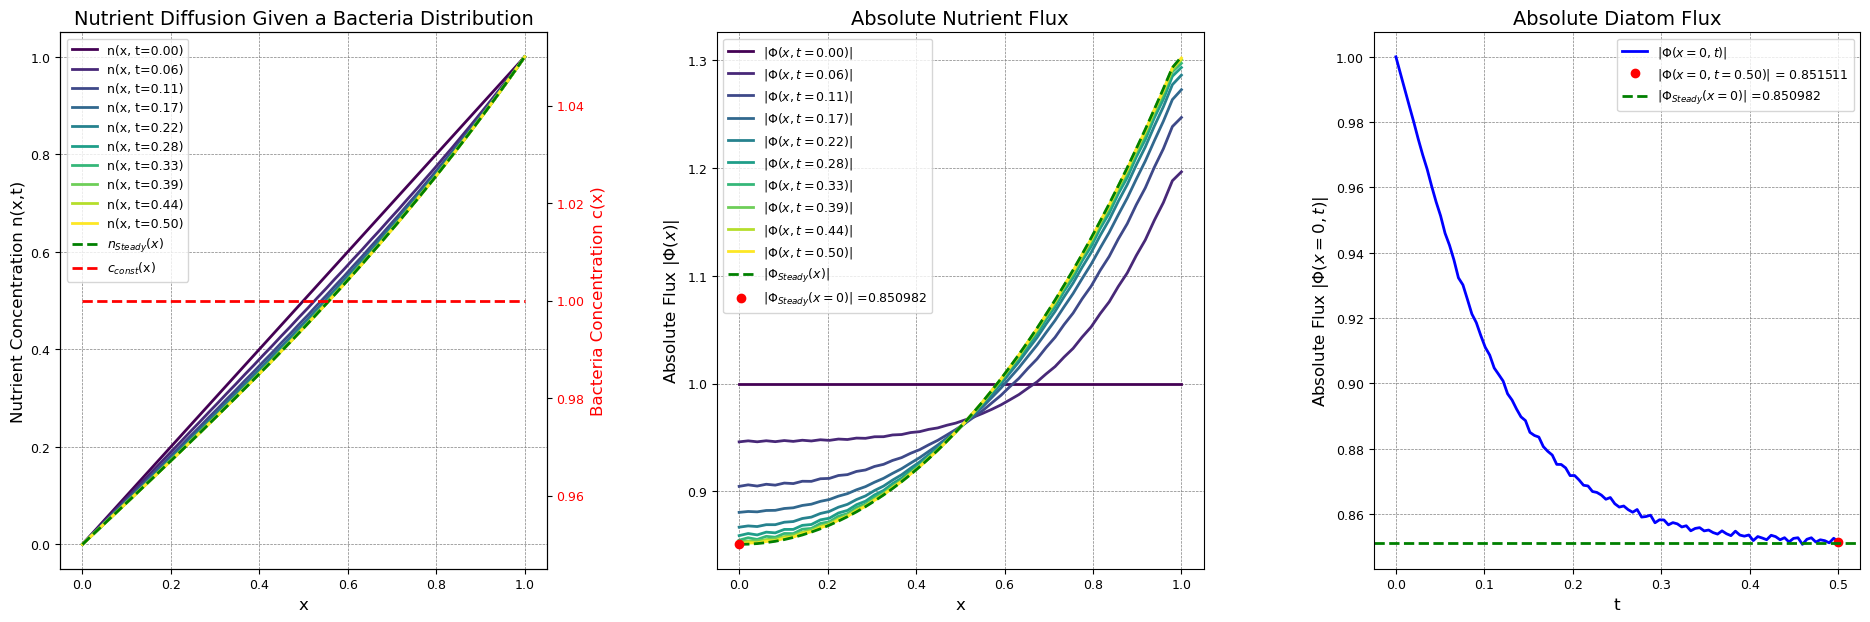

In [ ]:
syst_params['Tc'] = 1
syst_params['T']  = 0.5

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "Diff~Consump")

### Consumption Domination ($T_c \gg 1$)

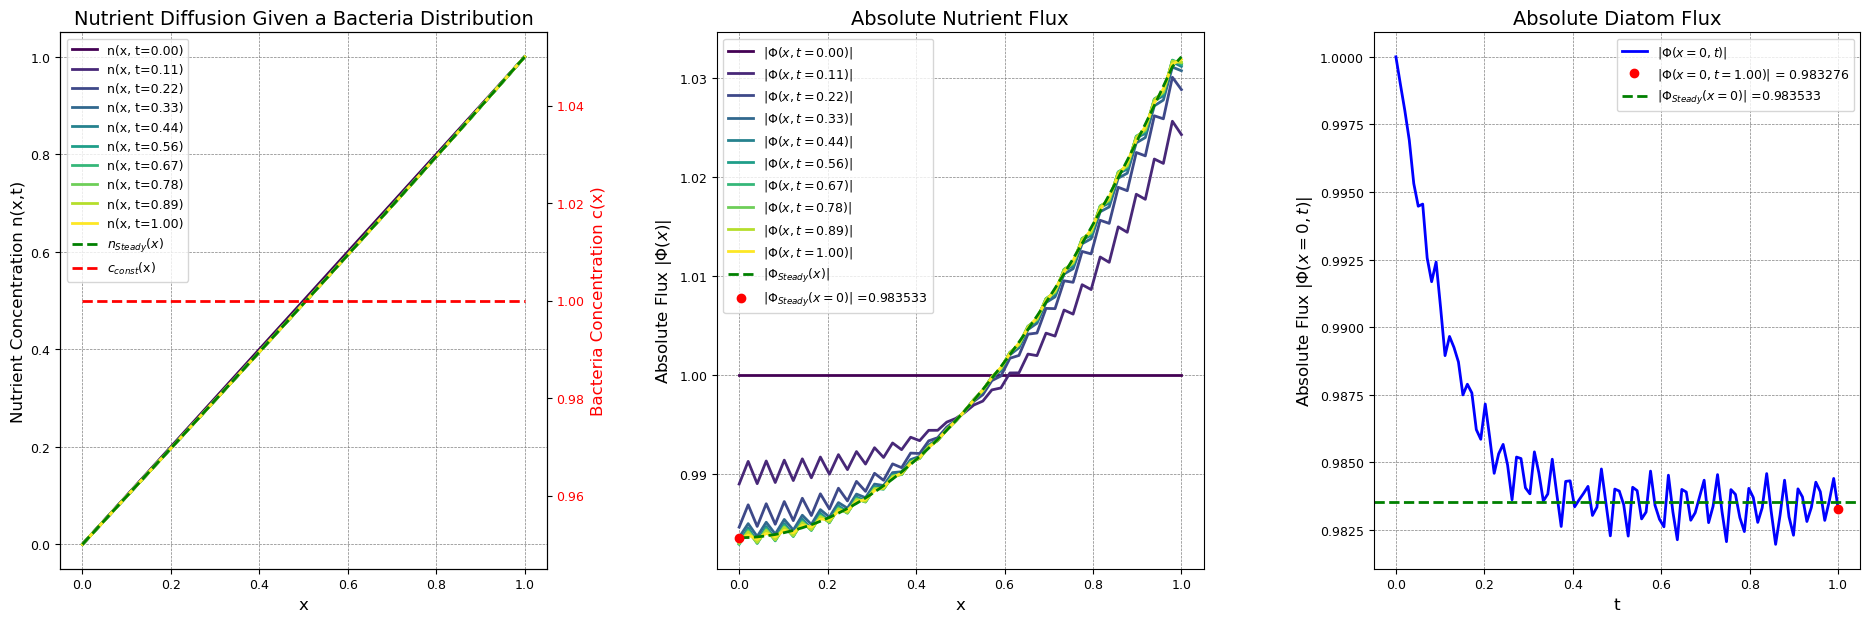

In [ ]:
syst_params['Tc'] = 10
syst_params['T']  = 1

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "Consump_Dom")

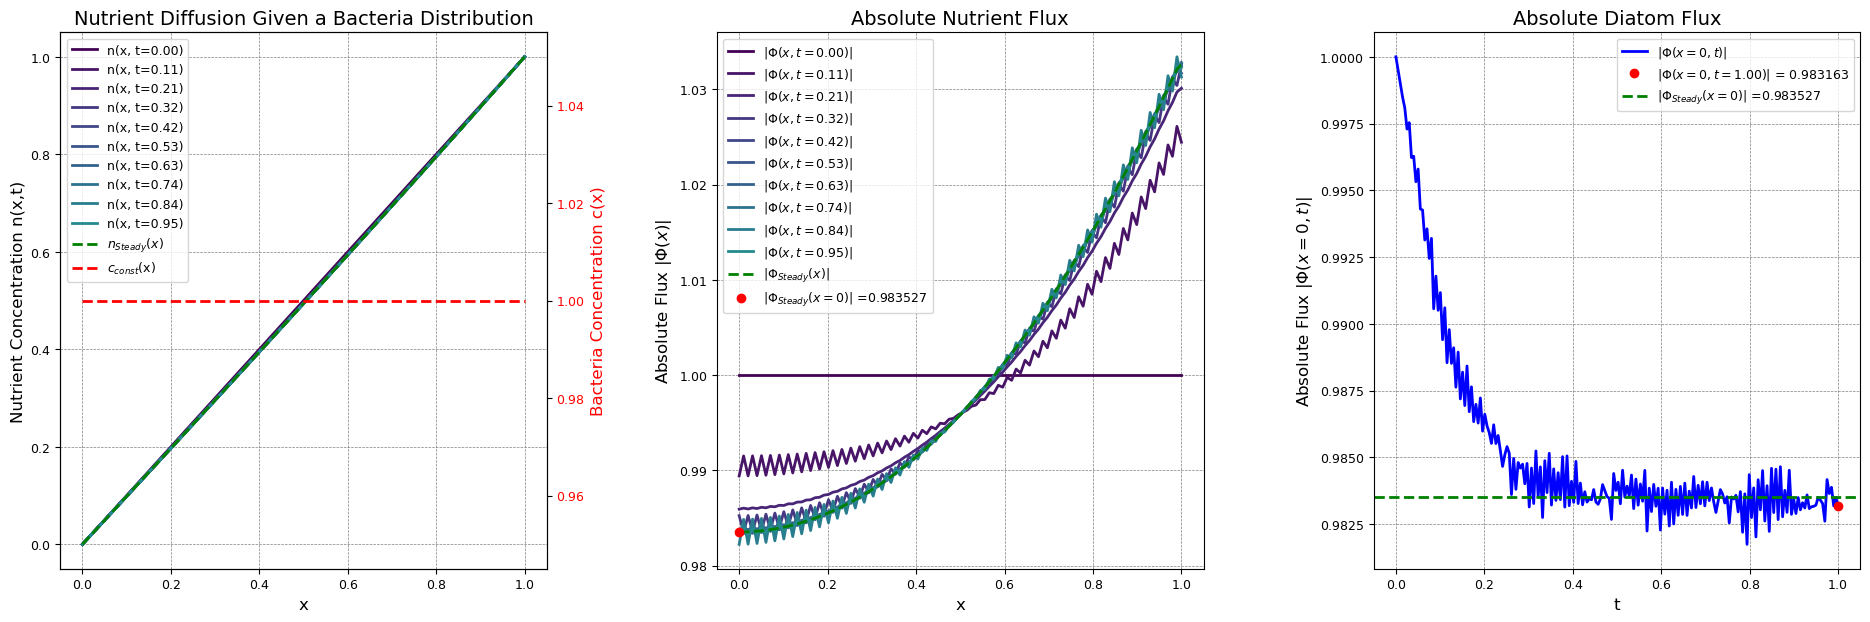

In [ ]:
# Double the grid's point
syst_params['nx'] = 100
syst_params['nt'] = 200

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.triple_plot()

## Why Do Spurious Oscillations Appear?
Posible reasons?
- **Insufficient grid resolution**
  - Increasing grid resolution ❌
- **Non-smooth initial condition or boundary condition**
  - Using smoothed out $c(x)$ and $n (x,t=0)$ ❌
- **Choice of numerical scheme / Stability issues**
  - Try rescaling factors, avoid floating-point numbers (as: $\alpha = 1/10$)❓